In [1]:
import os
import pandas as pd
from sklearn.metrics import  mean_absolute_error
import matplotlib.pyplot as plt

In [8]:
df1_relative_path = os.path.join('..', 'data', 'df1.csv')
df_exo_1_relative_path = os.path.join('..', 'data', 'df_exo_1.csv')

df1=pd.read_csv(df1_relative_path, parse_dates=True).set_index('Date')
df_exo=pd.read_csv(df_exo_1_relative_path, parse_dates=True).set_index('Date')

In [3]:
from statsmodels.tsa.arima.model import ARIMA   
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [105]:
df1.head()

,Weekly_Sales
Date,
2010-02-05,1967220.53
2010-02-12,2030933.46
2010-02-19,1970274.64
2010-02-26,1817850.32
2010-03-05,1939980.43


In [19]:
df_end=df1.copy()

<Axes: xlabel='Date'>

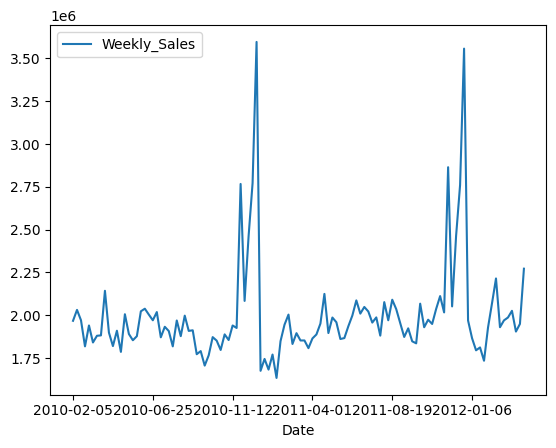

In [107]:
df1.plot()

# Exponential smoothing

## SimpleExpSmoothing

In [108]:
model1=SimpleExpSmoothing(df_end.Weekly_Sales)
ses=model1.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [109]:
df_end['SES'] = ses.fittedvalues

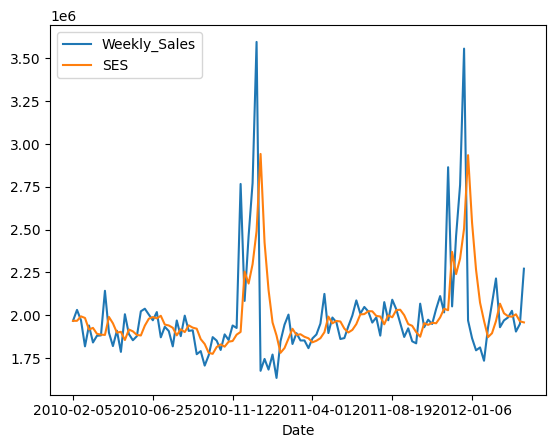

In [110]:
df_end[['Weekly_Sales', 'SES']].plot()
plt.show()

## DoubleExpSmoothing

In [111]:
model1_1=ExponentialSmoothing(df_end.Weekly_Sales,trend='add')
des=model1_1.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [112]:
df_end['DES'] = des.fittedvalues

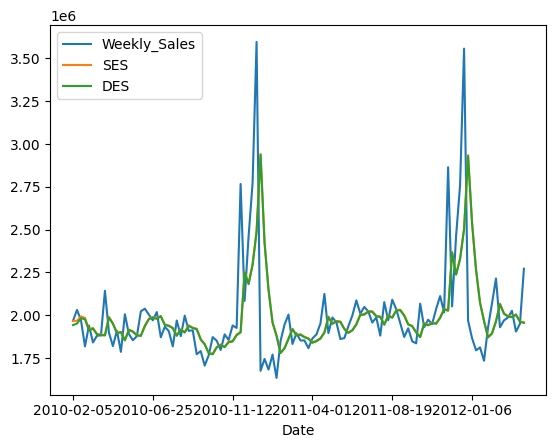

In [113]:
df_end[['Weekly_Sales','SES','DES']].plot()
plt.show()

## TripleExpSmoothing

In [114]:
model1_2=ExponentialSmoothing(df_end.Weekly_Sales,trend='add',seasonal='add')
tes=model1_2.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [115]:
df_end['TES'] = des.fittedvalues

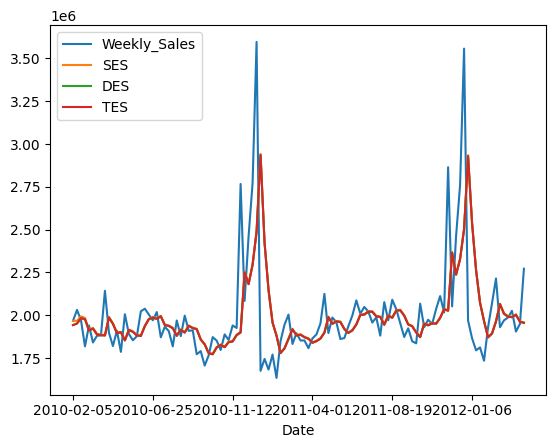

In [116]:
df_end[['Weekly_Sales','SES','DES','TES']].plot()
plt.show()

# Arima

In [117]:
model2 = ARIMA(df_end.Weekly_Sales, order=(1, 0, 2))
ar_fit=model2.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [118]:
ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1580.947
Date:                Wed, 20 Dec 2023   AIC                           3171.894
Time:                        14:56:54   BIC                           3185.575
Sample:                    02-05-2010   HQIC                          3177.446
                         - 04-06-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.994e+06   5.96e+04     33.436      0.000    1.88e+06    2.11e+06
ar.L1         -0.6978      0.106     -6.558      0.000      -0.906      -0.489
ma.L1          1.2232      0.094     13.070      0.000       1.040       1.407
ma.L2          0.6331      0.047     13.411      0.000       0.541       0.726
sigma2      7.409e+10      0.271   2.73e+11      0.000    7.41e+10    7.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               159.45
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               6.68   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+33. Standard errors may be unstable.
"""

In [119]:
df_end['ARIMA'] = ar_fit.predict()


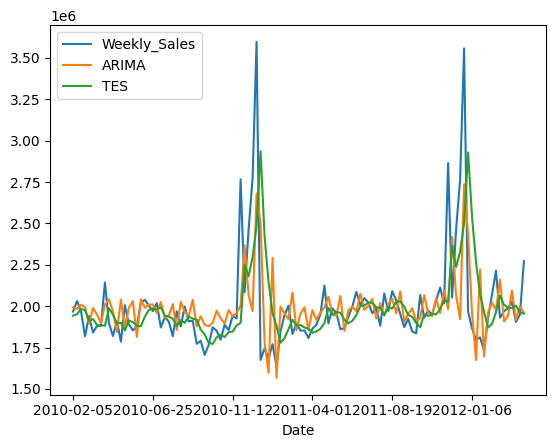

In [121]:
df_end[['Weekly_Sales', 'ARIMA','TES']].plot()
plt.show()

# Sarima

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

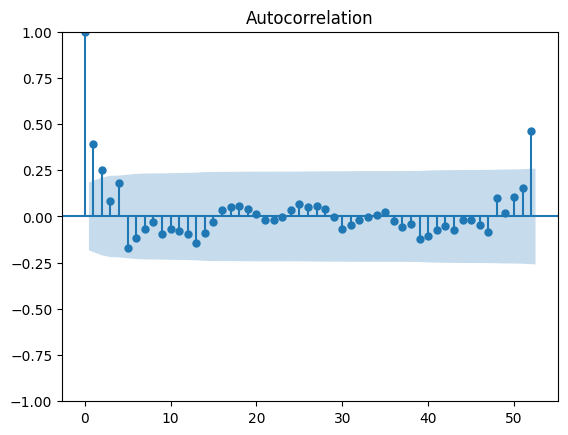

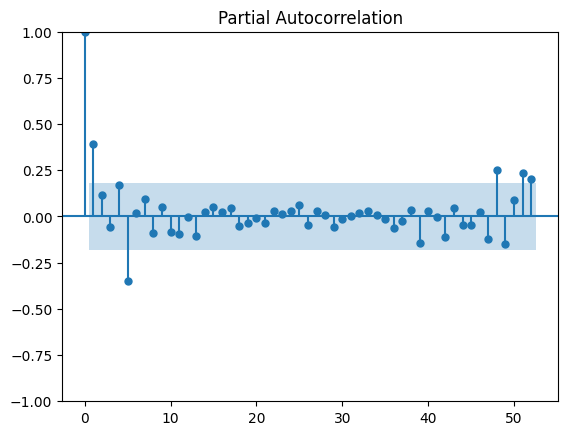

In [125]:
plot_acf(df1,lags=52)  
plot_pacf(df1,lags=52)
plt.show()

In [138]:
model3 = SARIMAX(df_end.Weekly_Sales, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
sar_fit=model3.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [133]:
sar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1579.018
Date:                            Wed, 20 Dec 2023   AIC                           3168.036
Time:                                    15:54:36   BIC                           3181.717
Sample:                                02-05-2010   HQIC                          3173.589
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9922      0.029     34.762      0.000       0.936       1.048
ma.L1         -0.5612      0.125     -4.502      0.000      -0.805      -0.317
ar.S.L52       0.6098      2.157      0.283      0.777      -3.618       4.837
ma.S.L52      -0.0018      3.430     -0.001      1.000      -6.724       6.720
sigma2      8.958e+10   6.23e-11   1.44e+21      0.000    8.96e+10    8.96e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               616.51
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.09e+37. Standard errors may be unstable.
"""

In [134]:
df_end['SARIMA'] = sar_fit.predict()

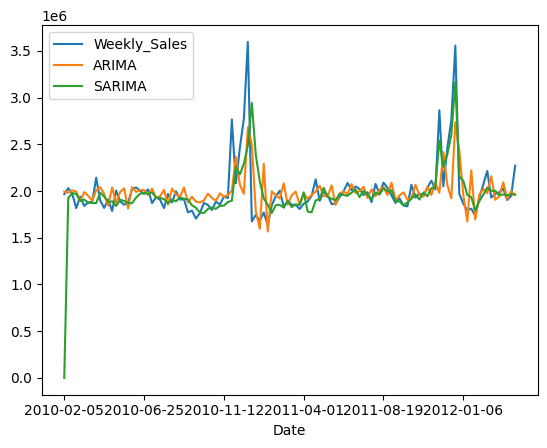

In [135]:
df_end[['Weekly_Sales', 'ARIMA','SARIMA']].plot()
plt.show()

## Auto Arima

In [10]:
from pmdarima import  auto_arima

In [142]:
auto_arima(df_end.Weekly_Sales,seasonal=True,m=52,max_P=5,max_D=1,max_Q=2)

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 0, 0, 52),
      suppress_warnings=True)

In [143]:
model4 = SARIMAX(df_end.Weekly_Sales, order=(2, 0, 2), seasonal_order=(1, 0, 0, 52))
aar_fit=model4.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

In [144]:
aar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1575.094
Date:                             Wed, 20 Dec 2023   AIC                           3162.187
Time:                                     16:06:26   BIC                           3178.604
Sample:                                 02-05-2010   HQIC                          3168.850
                                      - 04-06-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0826      0.846      0.098      0.922      -1.576       1.741
ar.L2          0.9004      0.859      1.048      0.295      -0.784       2.584
ma.L1          0.3591      0.881      0.407      0.684      -1.368       2.086
ma.L2         -0.4311      0.613     -0.704      0.482      -1.632       0.770
ar.S.L52       0.6332      0.072      8.790      0.000       0.492       0.774
sigma2      8.047e+10   3.35e-11   2.41e+21      0.000    8.05e+10    8.05e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):               629.68
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                            -0.51
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.56e+37. Standard errors may be unstable.
"""

In [145]:
df_end['AUTO_ARIMA'] = aar_fit.predict()

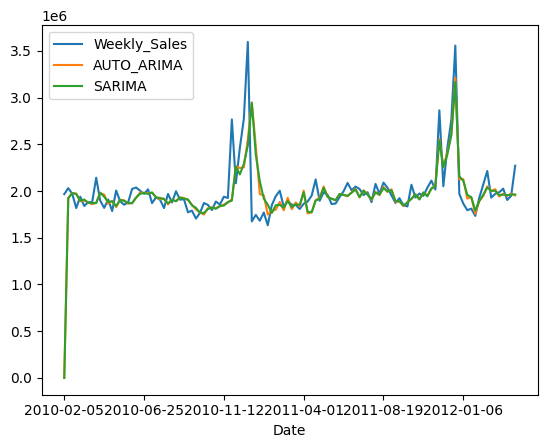

In [146]:
df_end[['Weekly_Sales', 'AUTO_ARIMA','SARIMA']].plot()
plt.show()

# Sarimax

In [9]:
df_exo.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1967220.53,31.53,2.666,0.0,0.0,0.0,0.0,0.0,126.442065,8.316,0
2010-02-12,2030933.46,33.16,2.671,0.0,0.0,0.0,0.0,0.0,126.496258,8.316,1
2010-02-19,1970274.64,35.70,2.654,0.0,0.0,0.0,0.0,0.0,126.526286,8.316,0
2010-02-26,1817850.32,29.98,2.667,0.0,0.0,0.0,0.0,0.0,126.552286,8.316,0
2010-03-05,1939980.43,40.65,2.681,0.0,0.0,0.0,0.0,0.0,126.578286,8.316,0


In [30]:
model5 = SARIMAX(df_exo.Weekly_Sales, order=(2, 0, 2), seasonal_order=(1, 0, 0, 52),exog=df_exo[[
                                                                                                 'IsHoliday','Temperature']])
aa_exo_fit=model5.fit()

c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\angel\Desktop\DataScience\darts_practice\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [31]:
aa_exo_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  115
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1645.348
Date:                             Thu, 21 Dec 2023   AIC                           3306.696
Time:                                     20:56:00   BIC                           3328.656
Sample:                                 02-05-2010   HQIC                          3315.610
                                      - 04-13-2012                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
IsHoliday     7.44e+05     19.791   3.76e+04      0.000    7.44e+05    7.44e+05
Temperature  3.417e+04   6260.538      5.458      0.000    2.19e+04    4.64e+04
ar.L1           1.9276      0.094     20.430      0.000       1.743       2.113
ar.L2          -0.9466      0.081    -11.675      0.000      -1.106      -0.788
ma.L1          -1.5973      0.195     -8.206      0.000      -1.979      -1.216
ma.L2           0.6416      0.209      3.065      0.002       0.231       1.052
ar.S.L52        0.4879      0.099      4.918      0.000       0.293       0.682
sigma2       2.025e+11      0.000   1.09e+15      0.000    2.02e+11    2.02e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               372.58
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               3.74   Skew:                            -1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  6e+30. Standard errors may be unstable.
"""

In [32]:
df_end['AUTO_ARIMA_EXO'] = aa_exo_fit.predict()

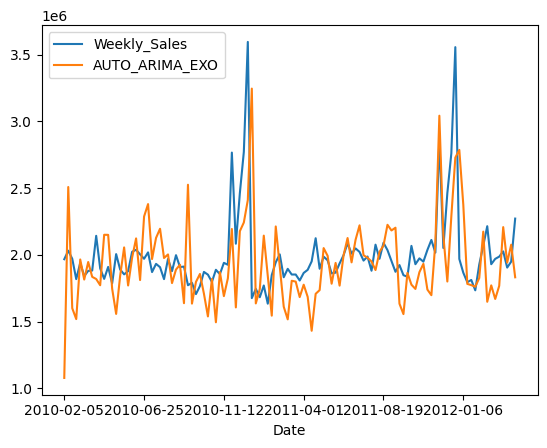

In [33]:
df_end[['Weekly_Sales', 'AUTO_ARIMA_EXO']].plot()
plt.show()